<h1>Perform Data Cleaning </h1>

<em><strong>Task : </strong>Clean a dataset by removing missing values and outliers</em>

<h1>Import Library</h1>

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

<h1>Import data</h1>

In [2]:
dataset = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Loan%20Eligibility%20Prediction.csv')

In [3]:
dataset.head(3)

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


<h1>Cleaning Data</h1>

<h3>Removing missing values</h3>

In [5]:
#first find out no. of missing values

In [6]:
dataset.isnull().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# No missing values exist , so no need to remove

<em>If null/missing values existed, then we could have removed rows and columns containing null values </em>

In [8]:
# remove columns having missing values
#dataset.drop(columns = ['Columns with null values'],inplace=True)
#remove rows having missing values 
#dataset[.dropna(inplace=True)

<h3>Removing Outliers</h3>

In [9]:
# first detect outlier

In [10]:
dataset.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


<em>There is possibility of column <strong>"Coapplicant_Income"</strong> having outliers, as diffrence between mi and max value is huge where mean is so small</em>

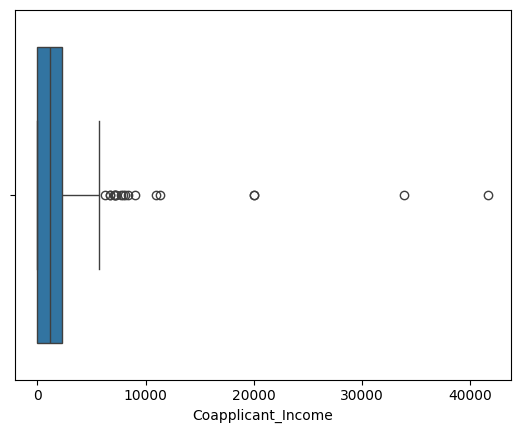

In [11]:
#We can detect using boxplot
sn.boxplot(x= 'Coapplicant_Income', data = dataset)
plt.show()

In [12]:
# Thus, using boxplot we can see the outliers 

In [13]:
# Now , we are going to remove these outliers using IQR method

<h2>Using IQR method to remove outliers</h2>

In [14]:
Q1 = dataset['Coapplicant_Income'].quantile(0.25)
Q3 = dataset['Coapplicant_Income'].quantile(0.75)

In [15]:
Q1, Q3

(0.0, 2297.25)

In [16]:
IQR = Q3 - Q1
IQR

2297.25

In [17]:
# finding minimum and maximum range
min_range = Q1 - 1.5*IQR
max_range = Q3 + 1.5*IQR
min_range, max_range

(-3445.875, 5743.125)

In [18]:
new_dataset = dataset[dataset['Coapplicant_Income']<max_range]

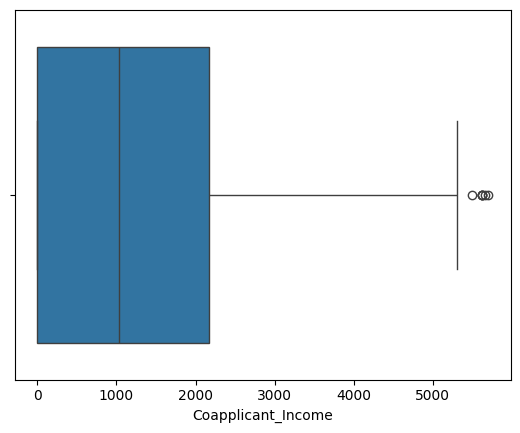

In [19]:
sn.boxplot(x = 'Coapplicant_Income', data = new_dataset)
plt.show()

In [21]:
# We can see that some outliers are present but removing all the outlier causes removal of data , which can decrese accuracy of model in future 